### Random Forest Exercise

------------------

In [ ]:
#test


In [ ]:
# import pandas
import pandas as pd

In [ ]:
# list for column headers
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=names)

Spend some time to explore the dataset.
- head
- shape

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* create the X and y (the goal is to predict column **class** based on other variables)

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:, -1]

In [ ]:
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

* split data set into a train set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

------------------------
#### Part 1: Setting up the Random Forest Classifier
* import RandomForestClassifier from sklearn. It is suggested to spend some time on the doccumentation of this classifier to get familiar with the available parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

* create model

In [ ]:
rf = RandomForestClassifier() #

* fit training set with default parameters

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* predict X_test

In [ ]:
y_hat = rf.predict(X_test)

In [ ]:
y_hat

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* import roc_auc_score and confusion_matrix from sklearn

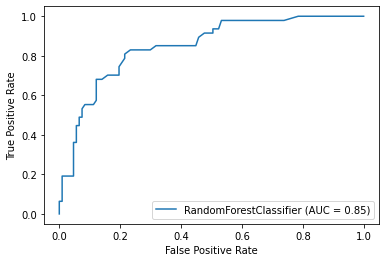

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
plot_roc_curve(rf, X_test, y_test)

* print confusion matrix

In [ ]:
from sklearn import metrics
confusionm = metrics.confusion_matrix(y_test, y_hat)

In [ ]:
confusionm

array([[94, 13],
       [16, 31]])

Confusion Matrix


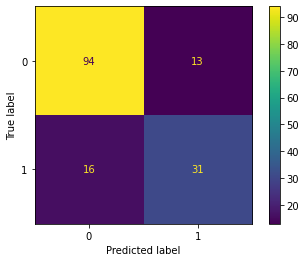

In [ ]:
print("Confusion Matrix")
plot_confusion_matrix(rf, X_test, y_test)

* print AUC

In [ ]:
AUC = metrics.roc_auc_score(y_test, y_hat)

In [ ]:
AUC

0.7690395704911512

In [ ]:
test_prob = rf.predict_proba(X_test)[:, 1]
test_pred = rf.predict(X_test)

In [ ]:
print("Log loss = {:.5f}".format(log_loss(y_hat, test_prob)))
print("AUC = {:.5f}".format(roc_auc_score(y_hat, test_prob)))
print("Average Precision = {:.5f}".format(average_precision_score(y_hat, test_prob)))
print("\nUsing 0.5 as threshold:")
print("Accuracy = {:.5f}".format(accuracy_score(y_hat, test_pred)))
print("Precision = {:.5f}".format(precision_score(y_hat, test_pred)))
print("Recall = {:.5f}".format(recall_score(y_hat, test_pred)))
print("F1 score = {:.5f}".format(f1_score(y_hat, test_pred)))
print("\nClassification Report")
print(classification_report(y_hat, test_pred))

Log loss = 0.27633
AUC = 1.00000
Average Precision = 1.00000

Using 0.5 as threshold:
Accuracy = 1.00000
Precision = 1.00000
Recall = 1.00000
F1 score = 1.00000

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        44

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



----------------------------------
#### Part 2: Using a Grid Search
- import GridSearchCV from sklearn

In [ ]:
#hello lila
# hello back # I see it ! :)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# make paramter grid
# make variable 'grid' with estimator etc
# best estimator?

In [ ]:
# parameter grid
parameter_candidates = {
    'n_estimators':[1,50,150,200,500,1000],
    'max_depth':[1,5,10,15,20]
}

In [ ]:
from sklearn import datasets, svm
from sklearn.model_selection import GridSearchCV
# Create a classifier...object with the MODEL classifier we first built with RF and parameter candidates
grid_result = GridSearchCV(rf, param_grid=parameter_candidates)
# Train the classifier on data1's feature and target data
the_fit = grid_result.fit(X_train, y_train) 
bestresult = grid_result.best_estimator_

In [ ]:
# View the accuracy score
print('Best score for data1:', grid_result.best_score_) 
print(grid_result.best_params_)
grid_result.score(X_train, y_train)

Best score for data1: 0.7655204584832733
{'max_depth': 5, 'n_estimators': 50}


0.8566775244299675

In [ ]:
# clf = RandomForestClassifier(max_depth=5, n_estimator = 50)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [ ]:
# parameter grid
parameter_candidates = {
    'n_estimators':[30,40,50,60,70],
    'max_depth':[3,4,5,6,7]
}

In [ ]:
from sklearn import datasets, svm
from sklearn.model_selection import GridSearchCV
# Create a classifier...object with the MODEL classifier we first built with RF and parameter candidates
grid_result = GridSearchCV(rf, param_grid=parameter_candidates)
# Train the classifier on data1's feature and target data
the_fit = grid_result.fit(X_train, y_train) 
bestresult = grid_result.best_estimator_

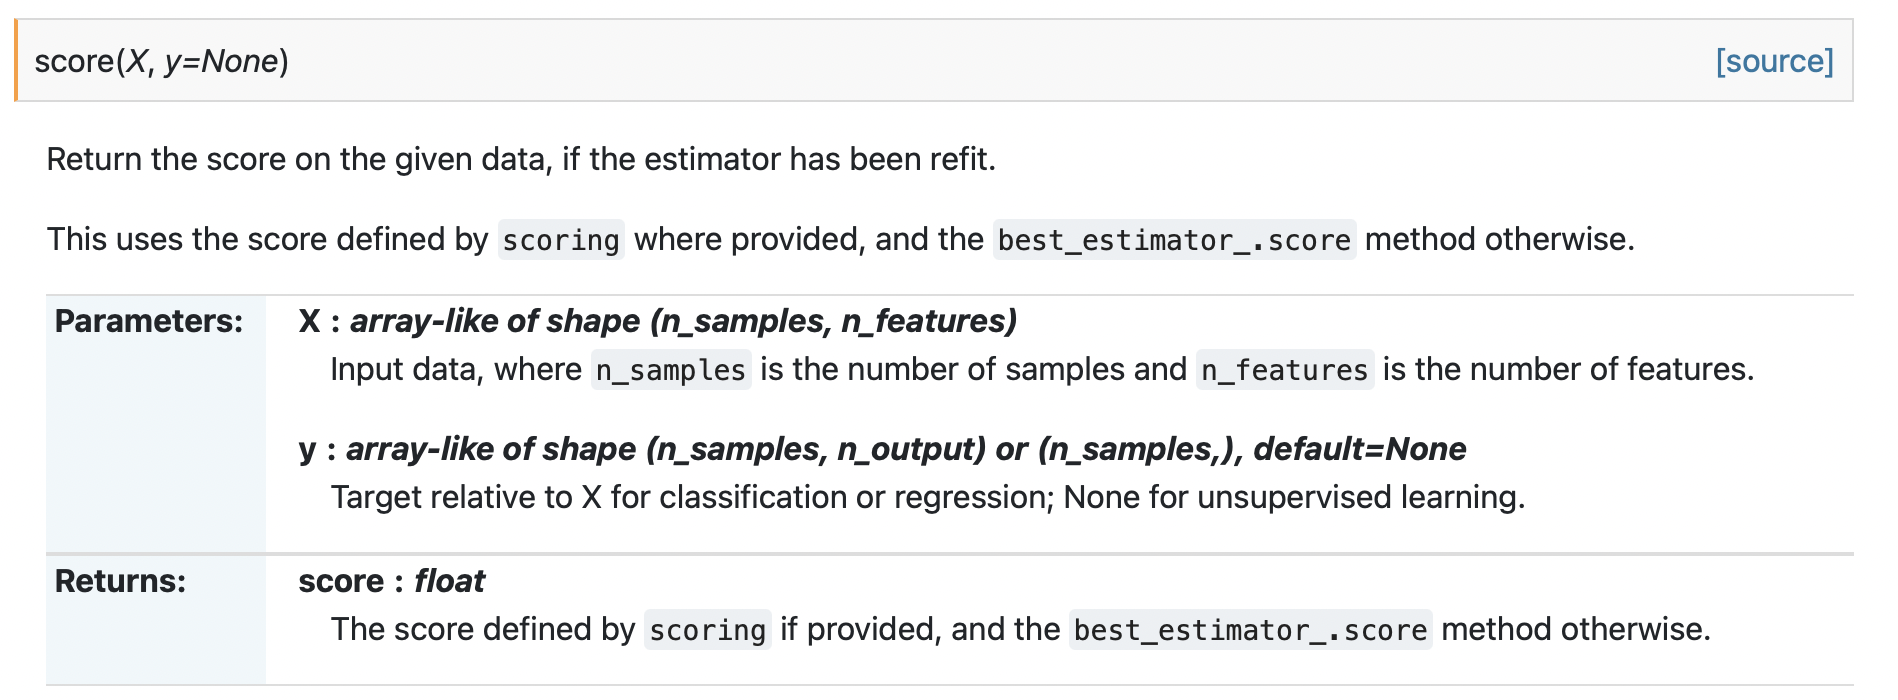

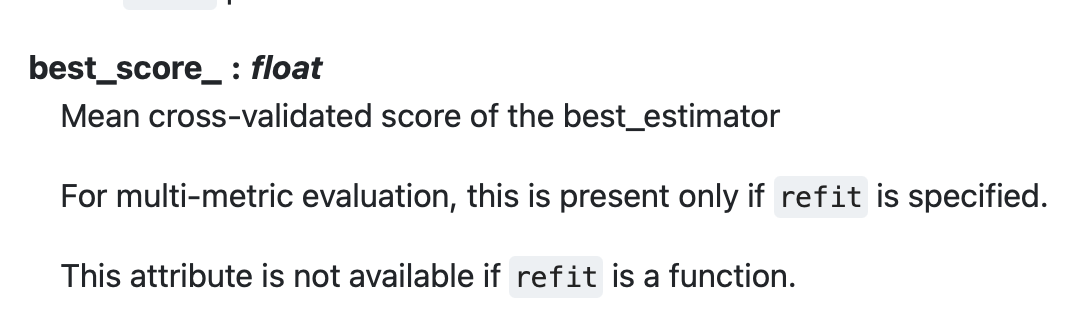

In [ ]:
# View the accuracy score
print('Best score for data1:', grid_result.best_score_) 
print(grid_result.best_params_)
print(bestresult)
grid_result.score(X_train, y_train)

Best score for data1: 0.7703718512594961
{'max_depth': 4, 'n_estimators': 40}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


0.8143322475570033

* create grid (optimize for number of trees and max depth in one tree)

* fit training data with grid search

In [ ]:
rf2 = RandomForestClassifier(n_estimators=40, max_depth=4)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)

In [ ]:
# y_test.reshape

(154,)

* print confusion matrix with the best model

2nd run Confusion Matrix


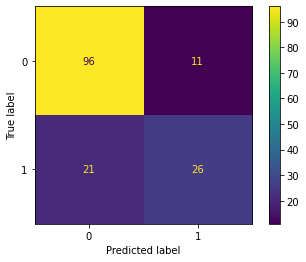

In [ ]:
print("2nd run Confusion Matrix")
plot_confusion_matrix(rf2, X_test, y_test)

* print AUC with the best model

- is the model better than default?